In [1]:
#Exercise 1
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Loading the dataset into a Pandas DataFrame
df = pd.read_csv("titanic.csv")

In [3]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [6]:
print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [18]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                        labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])


In [19]:
survivors_by_age_group = df[df['Survived'] == 1].groupby('AgeGroup', observed=False).size()


In [20]:
print(survivors_by_age_group)

AgeGroup
0-10       38
11-20      44
21-30     136
31-40      69
41-50      33
51-60      17
61-70       4
71-80       1
81-90       0
91-100      0
dtype: int64


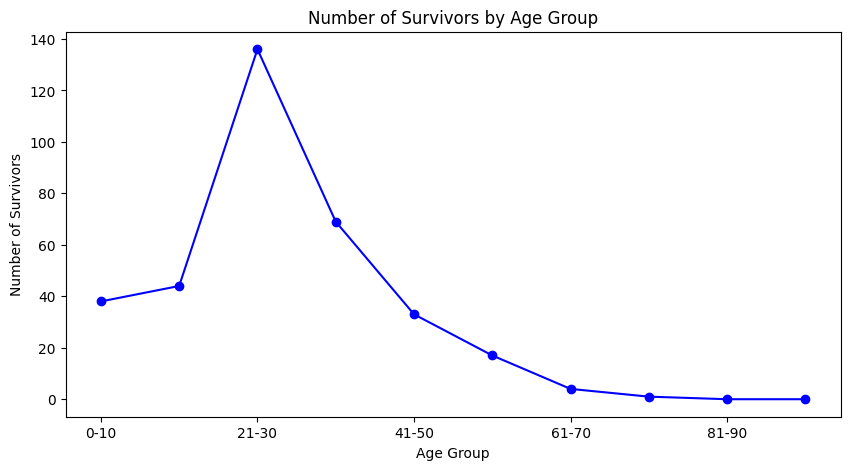

In [24]:
plt.figure(figsize=(10, 5))
survivors_by_age_group.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Number of Survivors by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Survivors')
plt.show()

In [25]:
#Exercise2
category_column = 'Pclass'

In [26]:
# Counting the frequency of each category
category_counts = df[category_column].value_counts()

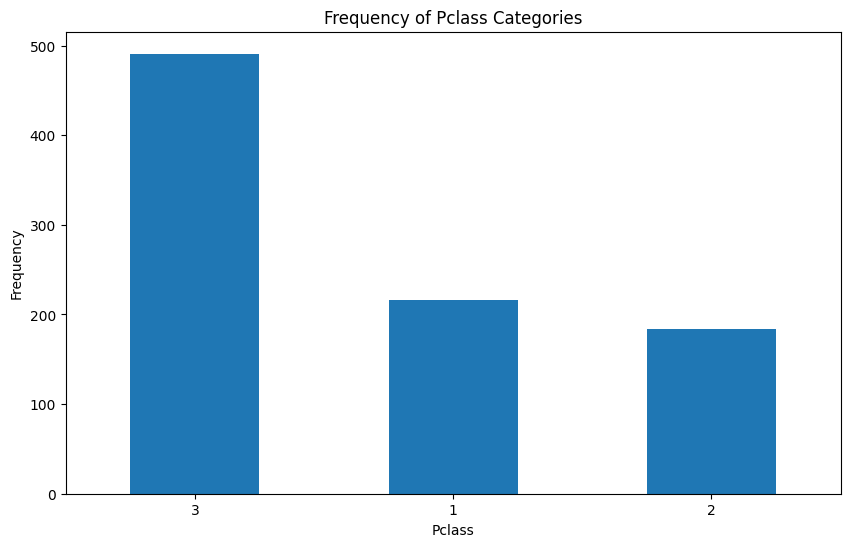

In [27]:
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title(f'Frequency of {category_column} Categories')
plt.xlabel(category_column)
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


In [28]:
#Exercise 3
x_column = 'Age'
y_column = 'Fare'

In [29]:
# Dropping rows with missing values in the chosen columns
df = df.dropna(subset=[x_column, y_column])

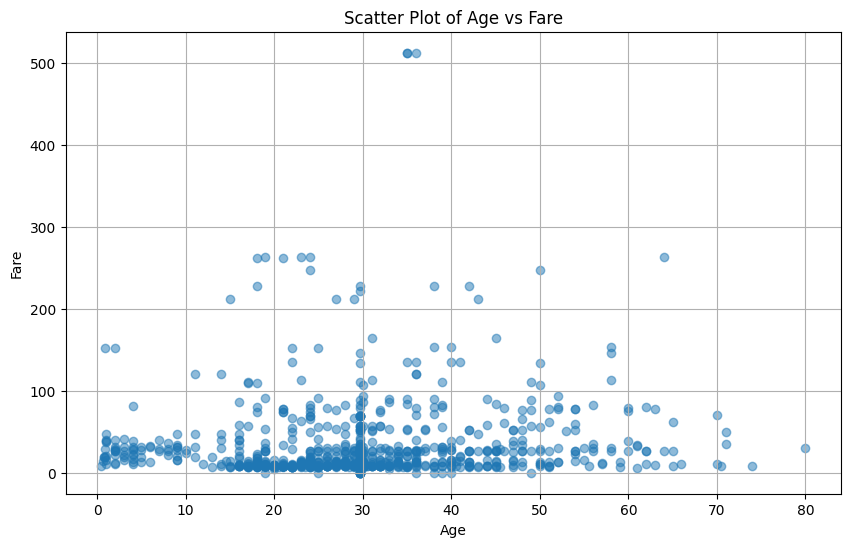

In [30]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df[x_column], df[y_column], alpha=0.5)
plt.title(f'Scatter Plot of {x_column} vs {y_column}')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

In [31]:
#Exercise 4
import seaborn as sns

In [35]:
# Loading titanic dataset through seaborn built-in functions
titanic = sns.load_dataset('titanic')

In [34]:
#Selecting thec features for the pairplot
features = ['age', 'fare', 'pclass', 'sibsp', 'parch']

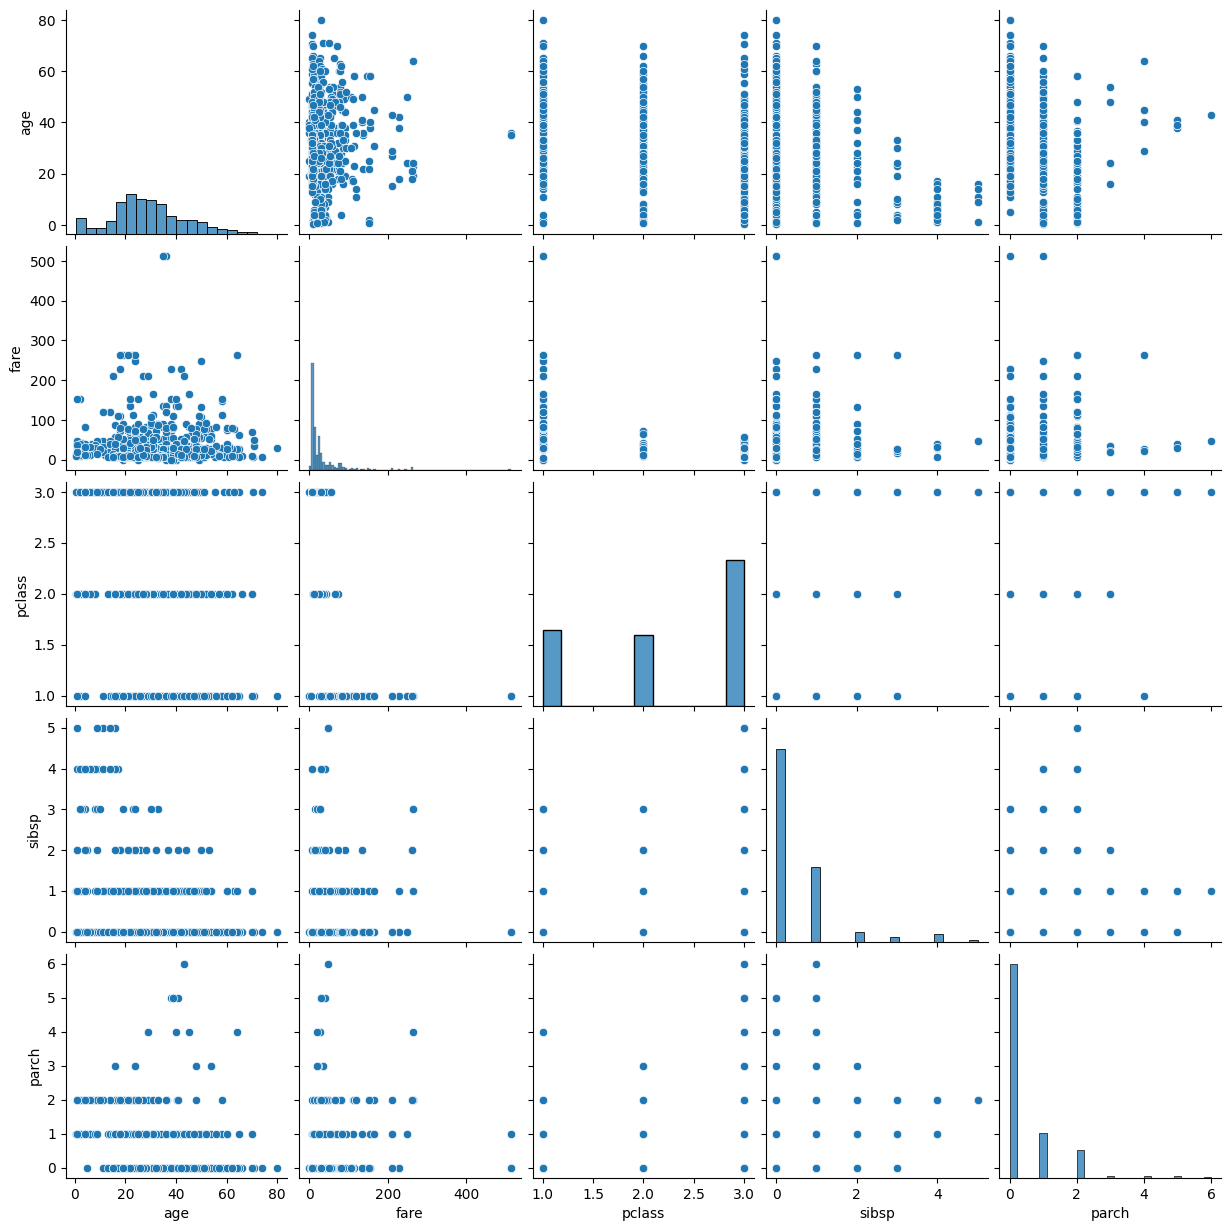

In [36]:
# Creating the pairplot
sns.pairplot(titanic[features].dropna())
plt.show()

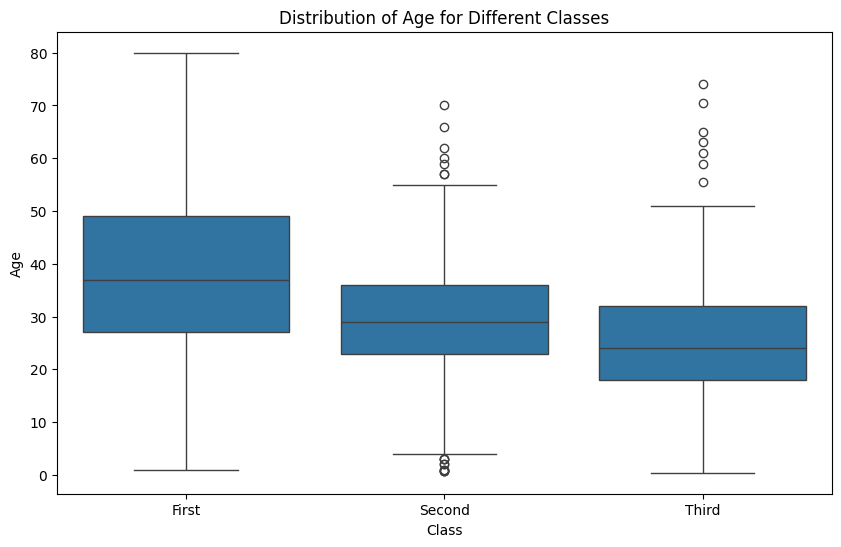

In [37]:
#Exercise5
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='age', data=titanic)
plt.title('Distribution of Age for Different Classes')
plt.xlabel('Class')
plt.ylabel('Age')
plt.show()

In [11]:
#Exercise6
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
titanic = sns.load_dataset('titanic')


In [9]:
#Selecting only numeric columns for correlation matrix
numeric_titanic = titanic.select_dtypes(include='number')

In [10]:
#Computing the correlation matrix
corr = numeric_titanic.corr()


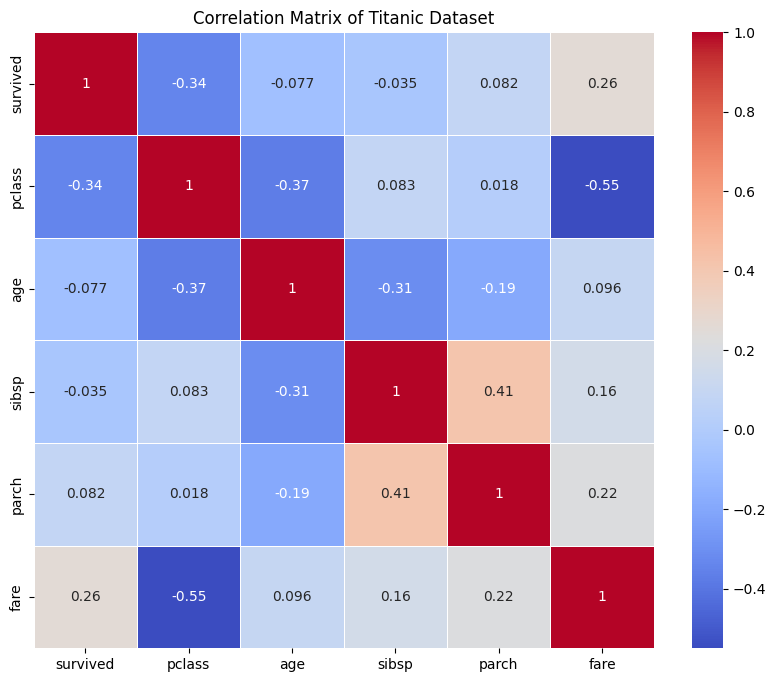

In [12]:
#Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()

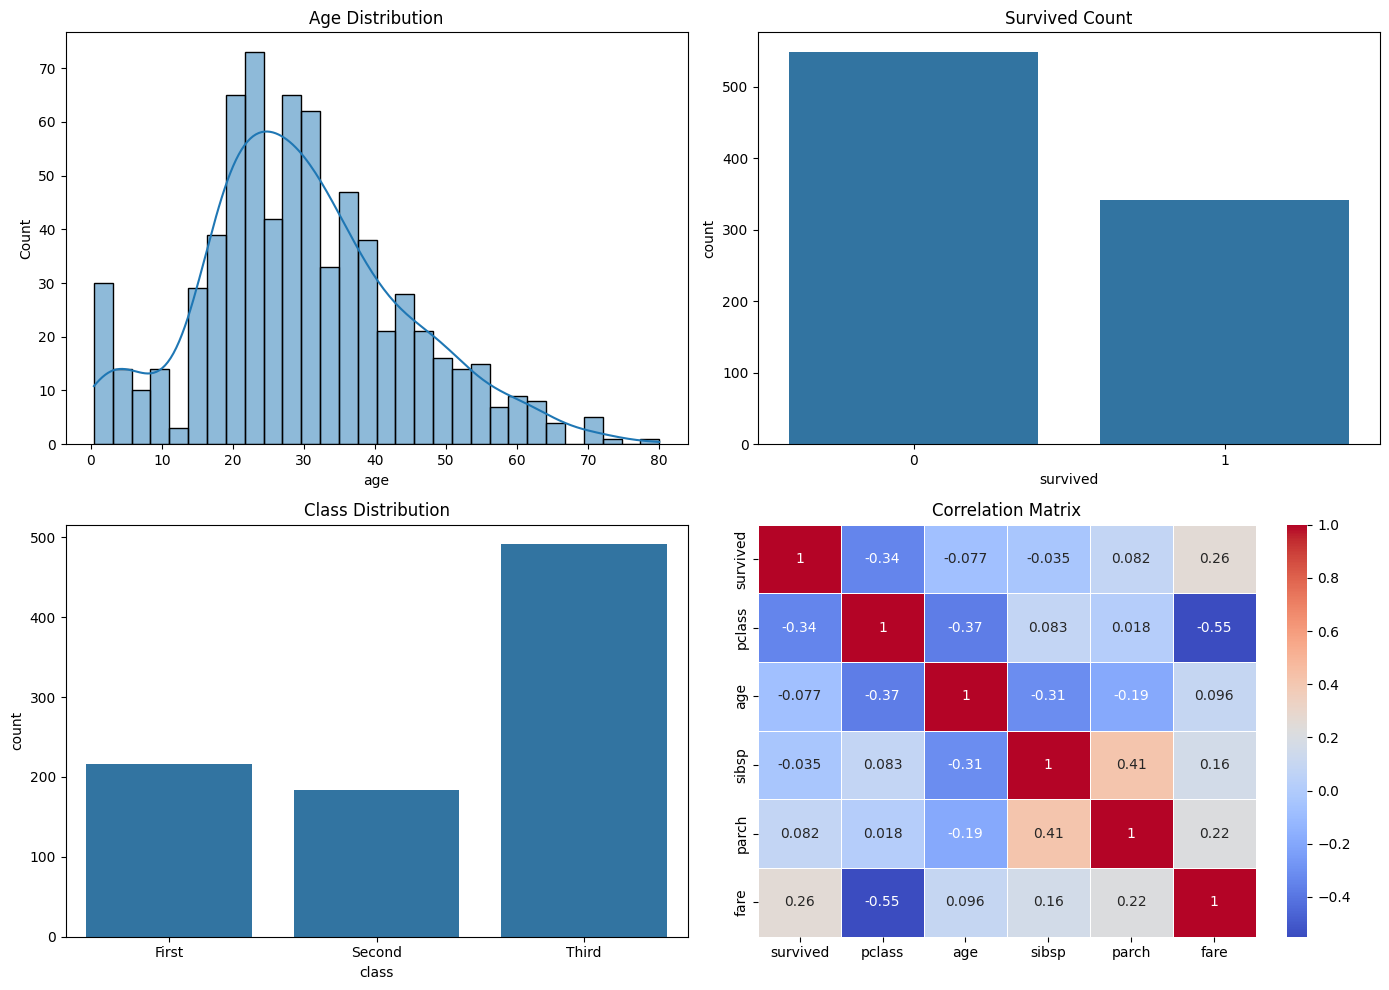

In [18]:
#Exercise7
# Create=ing a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
# Plot 1: Age distribution
sns.histplot(titanic['age'].dropna(), bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution')

# Plot 2:Survived count
sns.countplot(x='survived', data=titanic, ax=axes[0, 1])
axes[0, 1].set_title('Survived Count')

# Plot 3:Class distribution
sns.countplot(x='class', data=titanic, ax=axes[1, 0])
axes[1, 0].set_title('Class Distribution')

# Plot 4:Correlation heatmap
corr = titanic.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1, 1])
axes[1, 1].set_title('Correlation Matrix')

#Adjusting layout
plt.tight_layout()
plt.show()

In [19]:
#Exercise8
custom_palette = sns.color_palette("Set2")

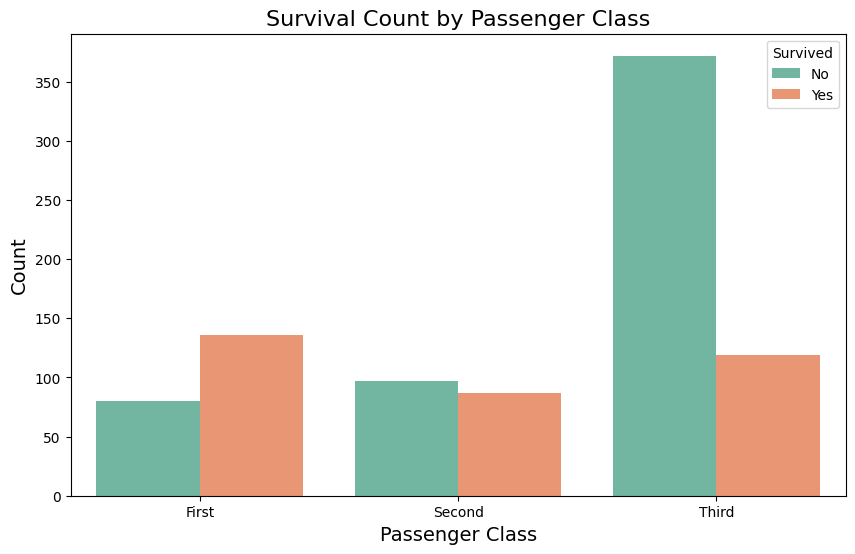

In [21]:
# A bar plot with the custom color palette
plt.figure(figsize=(10, 6))
sns.set_palette(custom_palette)
ax = sns.countplot(x='class', hue='survived', data=titanic)

# Adding titles and labels
plt.title('Survival Count by Passenger Class', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Modifying legend
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])

plt.show()

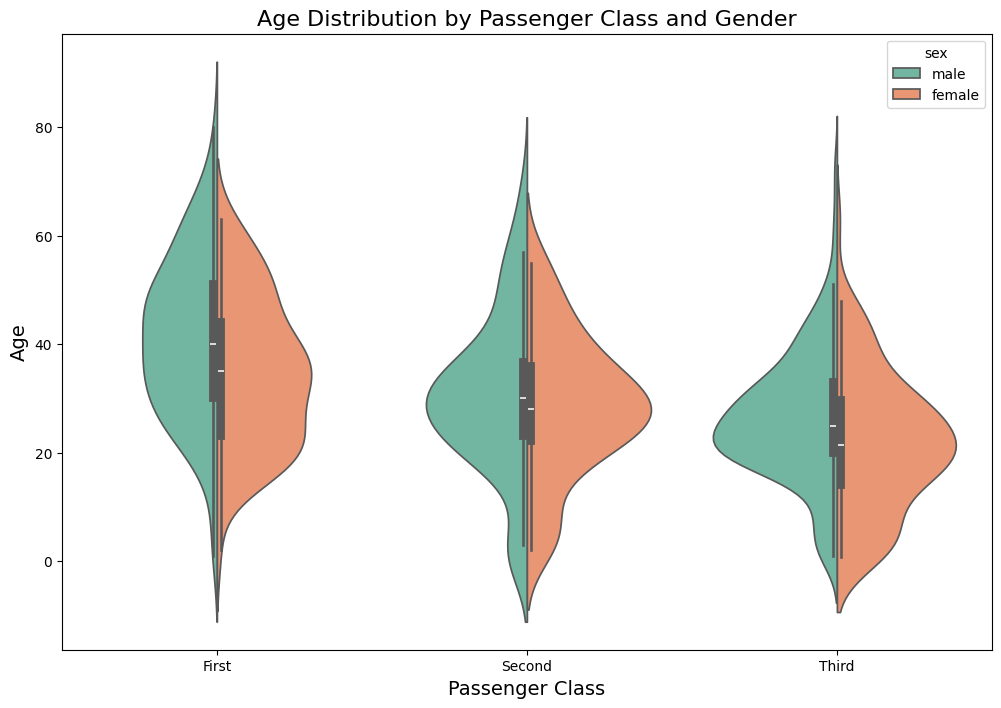

In [23]:
#Exercise9
# Creating a violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='class', y='age', hue='sex', data=titanic, split=True, palette='Set2')
# Titles and labels
plt.title('Age Distribution by Passenger Class and Gender', fontsize=16)
plt.xlabel('Passenger Class', fontsize=14)
plt.ylabel('Age', fontsize=14)

plt.show()

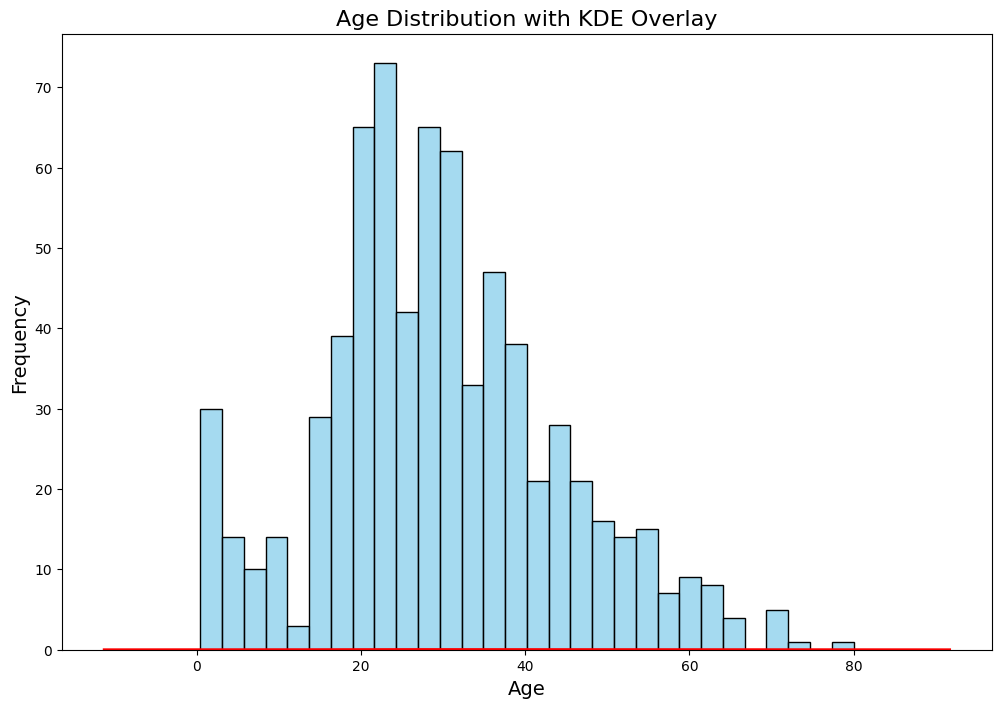

In [24]:
#Exercise10
# Creating a figure and axis
plt.figure(figsize=(12, 8))

# Plotting the histogram with Seaborn
sns.histplot(titanic['age'].dropna(), bins=30, kde=False, color='skyblue', edgecolor='black')

# KDE plot with Seaborn
sns.kdeplot(titanic['age'].dropna(), color='red', linewidth=2)

# Titles and labels
plt.title('Age Distribution with KDE Overlay', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

plt.show()